# Diabetes Prediction

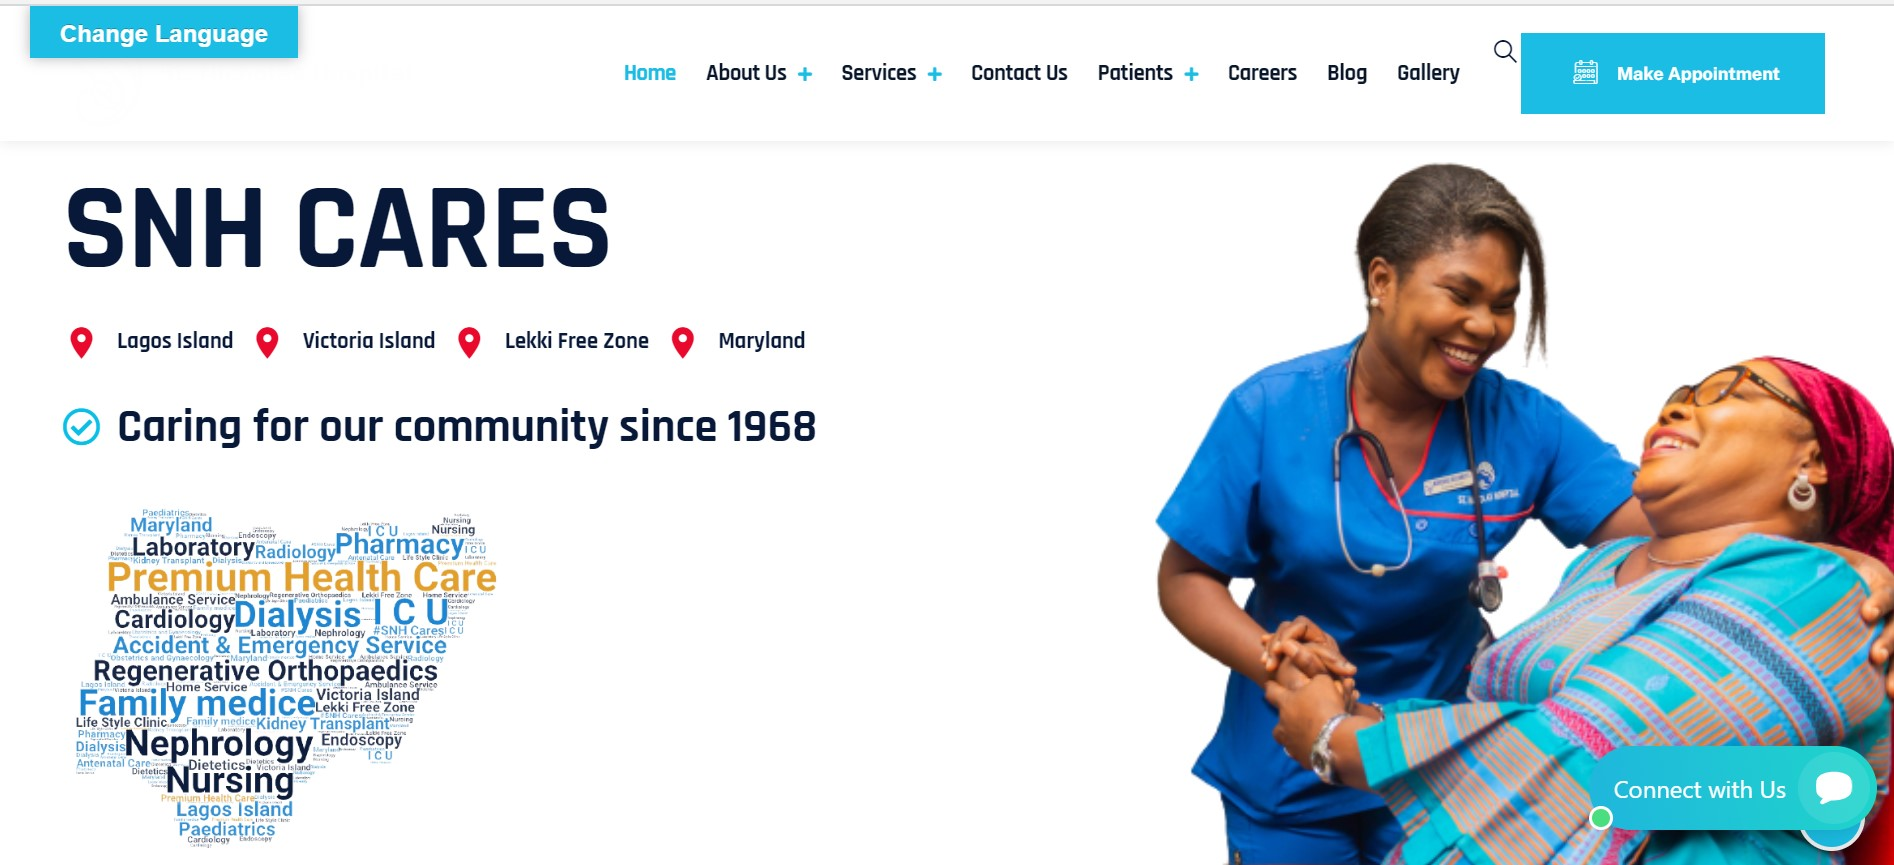

# DATA CLEANING AND EXPLORATION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [2]:
#Loading the Dataset
data = pd.read_csv('diabetes prediction.csv')

In [3]:
#Printing the first five rows
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
#Checking the size of the dataset
data.shape

(100000, 9)

In [5]:
#Checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.shape

(100000, 9)

In [7]:
data.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [8]:
data.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [9]:
data.age.min()

0.08

In [10]:
data.age.max()

80.0

In [11]:
data.hypertension.value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [12]:
data.heart_disease.value_counts()

0    96058
1     3942
Name: heart_disease, dtype: int64

In [13]:
data.smoking_history.value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [14]:
smoking_result = data.groupby(['smoking_history', 'diabetes'])

In [15]:
data.shape

(100000, 9)

In [16]:
data.duplicated().sum()

3854

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(96146, 9)

In [19]:
data.gender.unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [20]:
data.gender.value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [21]:
data.age.min()

0.08

In [22]:
data.age.max()

80.0

Text(0.5, 1.0, 'Distriubtion of Ages')

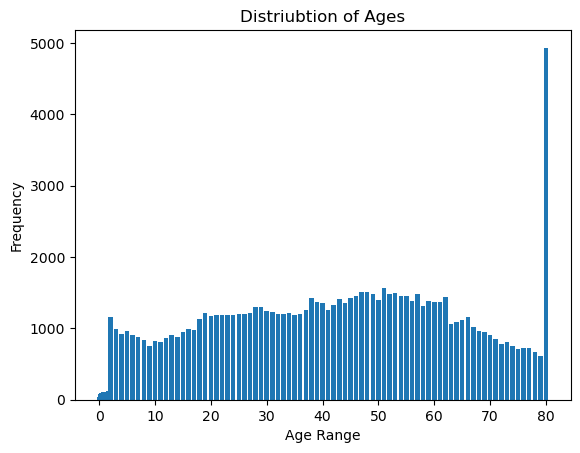

In [23]:
#Visualizing the Age using the histogram



# Grouping the data by age and counting the occurrences
age_counts = data['age'].value_counts().sort_index()


plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Distriubtion of Ages')

In [24]:
#Filter the dataset to find the total people with diabetes
no_with_diabetes = data[data['diabetes'] == 1]

In [25]:
no_with_diabetes.shape

(8482, 9)

In [26]:
#Filter the dataset to find the total people without diabetes
no_without_diabetes = data[data['diabetes'] == 0]

In [27]:
no_without_diabetes.shape

(87664, 9)

In [28]:
diabetes_count = data['diabetes'].value_counts()

Text(0.5, 1.0, 'Distribution of Diabetes')

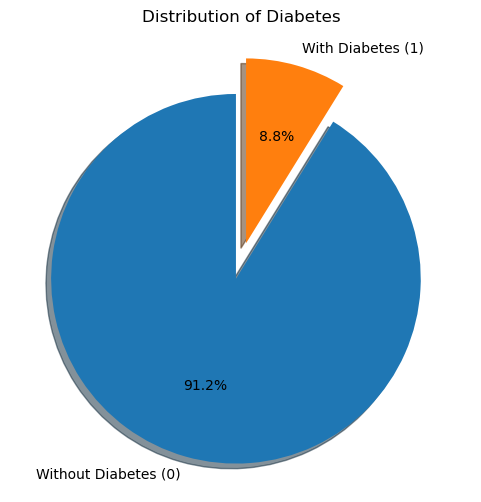

In [29]:
#Create a pie chart to show the number of people with diabetes
plt.figure(figsize = (6, 6))
explode = (0.1, 0.1)
plt.pie(diabetes_count, labels = ['Without Diabetes (0)', 'With Diabetes (1)'], startangle = 90, shadow = True, explode = explode, autopct = '%1.1f%%')
plt.title('Distribution of Diabetes')

We can see that 8.8% of our patients are diabetic

Text(0.5, 1.0, 'Count of People with Diabetes by Gender')

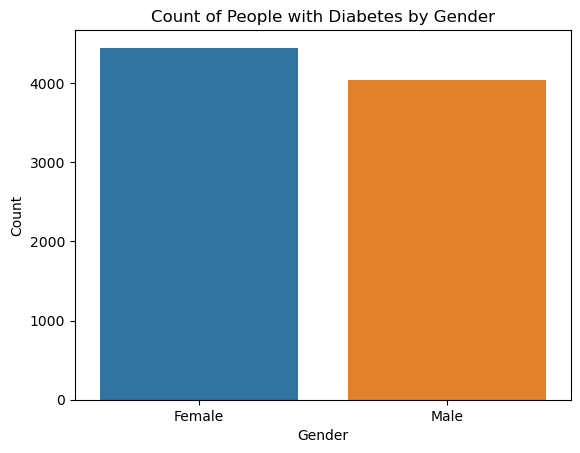

In [30]:
# Plotting gender feature by the target variable
figure = figsize = (10, 10)

# Distribution of Gender
ax = sns.countplot(x = no_with_diabetes['gender'], data = data )
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
ax.set_title("Count of People with Diabetes by Gender")




In [31]:
no_with_diabetes['gender'].value_counts()

Female    4447
Male      4035
Name: gender, dtype: int64

In [32]:
gender_percentages = data.groupby('gender')['diabetes'].mean()*100

In [33]:
gender_percentages

gender
Female     7.918306
Male      10.095829
Other      0.000000
Name: diabetes, dtype: float64

In [34]:
no_with_diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
6,Female,44.0,0,0,never,19.31,6.5,200,1
26,Male,67.0,0,1,not current,27.32,6.5,200,1
38,Male,50.0,1,0,current,27.32,5.7,260,1
40,Male,73.0,0,0,former,25.91,9.0,160,1
53,Female,53.0,0,0,former,27.32,7.0,159,1
...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1
99938,Male,55.0,0,1,former,30.42,6.2,300,1
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1
99962,Female,58.0,1,0,never,38.31,7.0,200,1


Text(0.5, 1.0, 'Age Distribution of People with Diabetes')

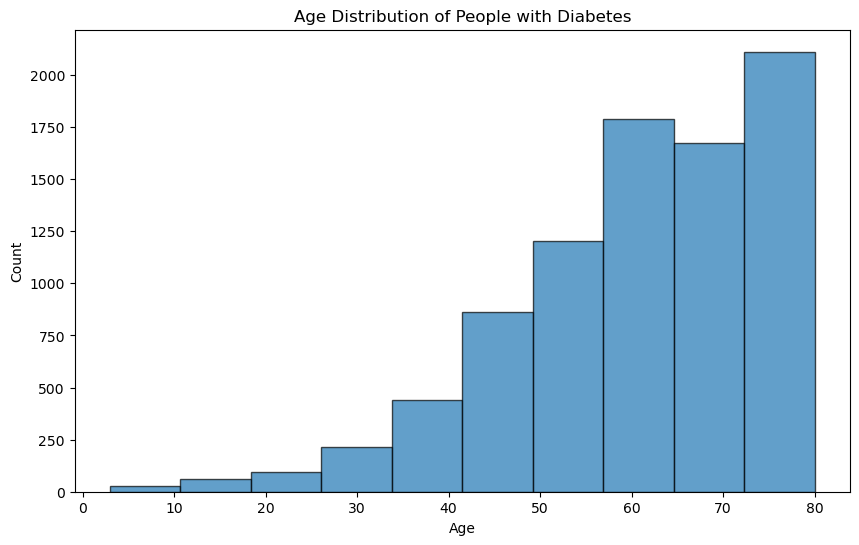

In [35]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(no_with_diabetes['age'], bins=10, edgecolor='k', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution of People with Diabetes')

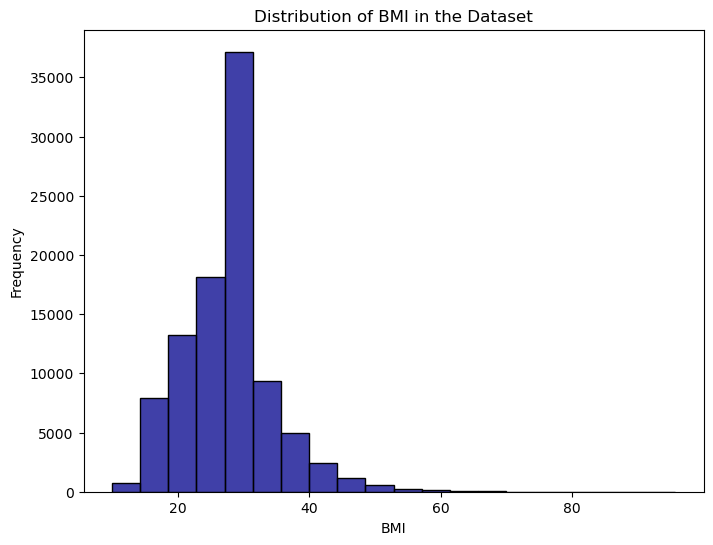

In [36]:
plt.figure(figsize=(8, 6))
sns.histplot(data = data, x  ='bmi', bins=20, kde=False, color='darkblue')
plt.title('Distribution of BMI in the Dataset')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


In [37]:
no_with_diabetes['gender'].value_counts()

Female    4447
Male      4035
Name: gender, dtype: int64

In [38]:
no_with_diabetes['age'].min()

3.0

In [39]:
no_with_diabetes['age'].max()

80.0

In [40]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

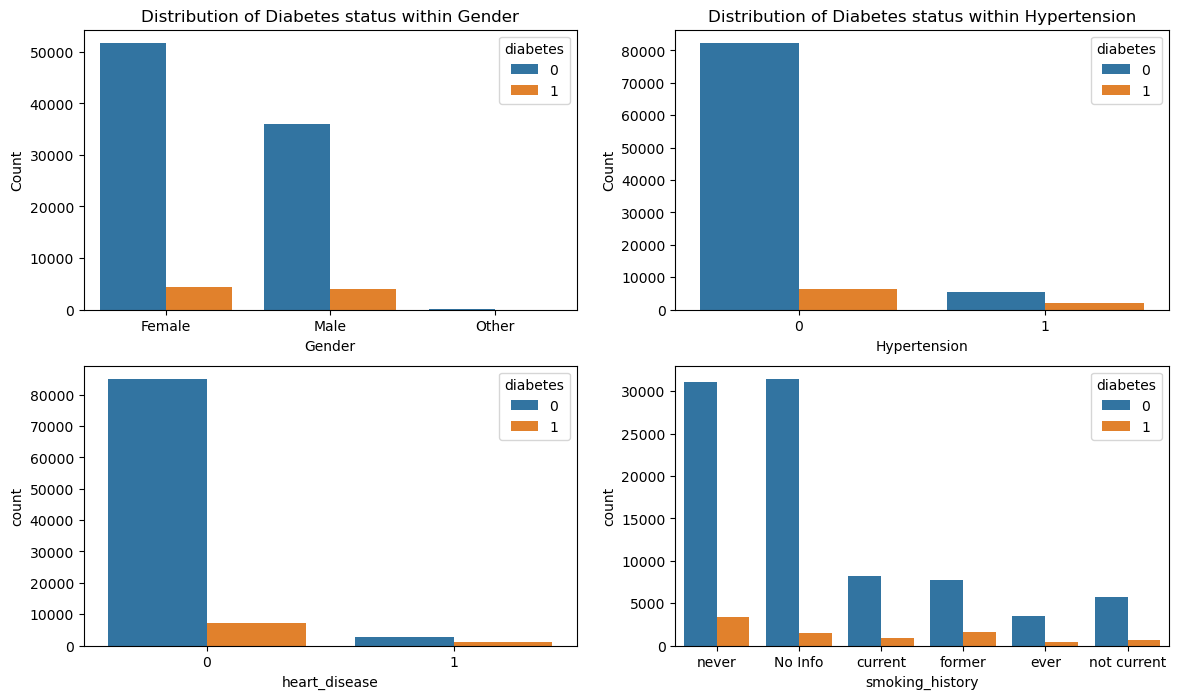

In [41]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

#Distribution of gender
sns.countplot(x="gender", data = data,hue = 'diabetes', ax = axes[0, 0])
axes[0, 0].set_title("Distribution of Diabetes status within Gender")
axes[0, 0].set_xlabel("Gender")
axes[0, 0].set_ylabel("Count")

#Distribution of Hypertension
sns.countplot(x="hypertension", data=data, hue = 'diabetes', ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

#Distribution of Heart Disease
sns.countplot(x="heart_disease", data=data, hue = 'diabetes', ax=axes[1, 0])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

#Distribution of Smoking History
sns.countplot(x="smoking_history", data=data, hue = 'diabetes', ax=axes[1, 1])
axes[0, 1].set_title("Distribution of Diabetes status within Hypertension")
axes[0, 1].set_xlabel("Hypertension")
axes[0, 1].set_ylabel("Count")

Text(0.5, 1.0, 'Count of People with Diabetes by Smoking History')

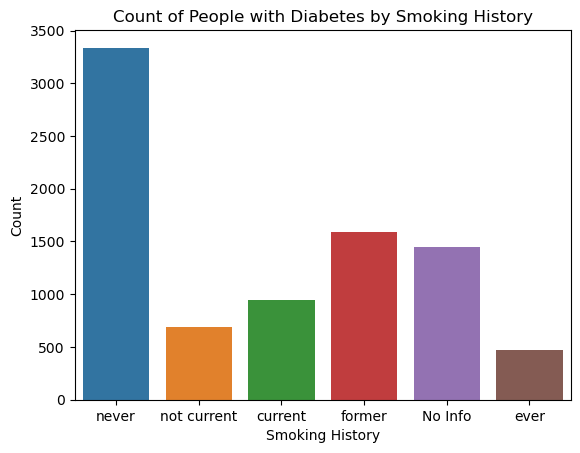

In [42]:
# Plotting gender feature by the target variable
figure = figsize = (10, 10)

# Distribution of Gender
ax = sns.countplot(x = no_with_diabetes['smoking_history'], data = data )
ax.set_xlabel("Smoking History")
ax.set_ylabel("Count")
ax.set_title("Count of People with Diabetes by Smoking History")

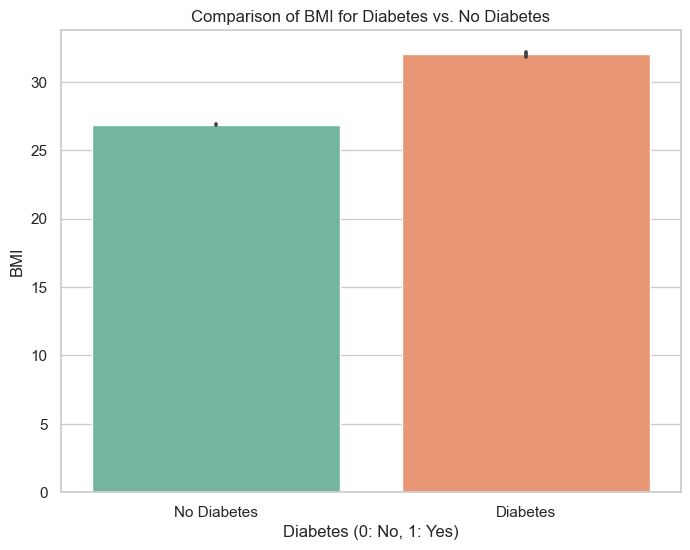

In [43]:
sns.set(style="whitegrid")

# Create a bar plot to compare BMI for individuals with and without diabetes
plt.figure(figsize=(8, 6))
sns.barplot(x='diabetes', y='bmi', data=data, palette='Set2')
plt.title('Comparison of BMI for Diabetes vs. No Diabetes')
plt.xlabel('Diabetes (0: No, 1: Yes)')
plt.ylabel('BMI')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()




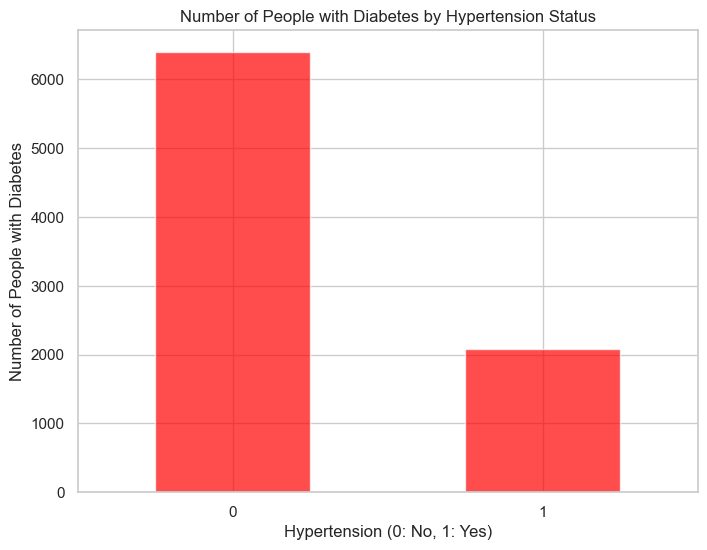

In [44]:
hypertension_disease_counts = no_with_diabetes.groupby('hypertension')['diabetes'].sum()

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
hypertension_disease_counts.plot(kind='bar', color='red', alpha=0.7)
plt.title('Number of People with Diabetes by Hypertension Status')
plt.xlabel('Hypertension (0: No, 1: Yes)')
plt.ylabel('Number of People with Diabetes')
plt.xticks(rotation=0)  
plt.show()

In [45]:
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [46]:
#mapping the object data type ' smoking_history' to numerical values
data['smoking_history_num'] = data['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})

C:\Users\USER\AppData\Local\Temp\ipykernel_3864\1101499881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoking_history_num'] = data['smoking_history'].map({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4})


In [47]:
#Create the model
model = LogisticRegression()

In [48]:
#Splitting the data into Features and Target
x = data.drop('diabetes', axis = 1) # Features
y = data['diabetes'] # Target Variable
x = x.drop('gender',axis=1)
x = x.drop('smoking_history', axis = 1)


In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [50]:
model.fit(x_train,y_train)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
y_pred=model.predict(x_test)

In [52]:
accuracy = accuracy_score(y_test, y_pred)

In [53]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.95
